In [23]:
from sklearn.ensemble import RandomForestClassifier # randomForestClassifier is a class
from sklearn.metrics import confusion_matrix

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from pandas import read_csv


from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

url = "/home/sundeep/Downloads/AI/AI_project/datasets_19_420_Iris.csv"
iris = read_csv(url)
print(iris.head())
# Import some data to play with
#iris = datasets.load_iris()
#X = iris.iloc
#y = iris.target

X = iris.iloc[:,1:5].values # : indicates rows 1:5 return 4 columns (sepal-length   sepal-width   petal-length   petal-width)
y = iris.iloc[:,5].values # return class value

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [41]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [57]:

# Binarize the output
y = label_binarize(y, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
n_classes = y.shape[1]

# Add noisy features to make the problem harder

# y_test = actual outcome
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=0) # 33% of data will be test, rest in trng


In [46]:


# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class

In [58]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')  # rfc is the model

# training model
#rfc.fit(y_train,y_train) # training the model, finding the best fit forest

# testing the model to predict the class for entire x_test
#y_pred = rfc.predict(y_test)

y_score = rfc.fit(X_train, y_train).predict_proba(X_test)


In [50]:
# gives mismatch of predictions - all diagonals are right predictions, non diagonals are wrongpredictions
# rows are the actual 
# columns are predicted

# comparing actual (y_test) with y_pred (what model predicted)
# 
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)

ValueError: multilabel-indicator is not supported

AxesSubplot(0.125,0.125;0.775x0.755)


NameError: name 'cm' is not defined

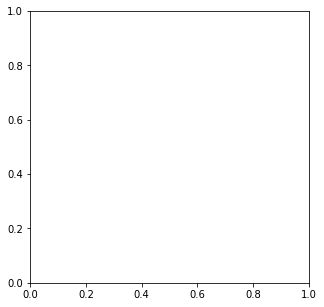

In [52]:
import seaborn as sns
f, ax = plt.subplots(figsize =(5,5)) # (f,ax) is a tuple where one is the actual graph, other is the aixis
print(ax)

# heatmap is the graphical rep created from confusion matrix
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax) # takes conf matrix, 
plt.xlabel("y_pred")
plt.ylabel("y_actual")
plt.show()

In [53]:

# analysis
y_score = rfc.predict_proba(X_test) # x_test =sepal-, petal, petawid, petal l)  verso
print(y_score)


[array([[1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]]), array([[1. , 0. ],
       [0. , 1. ],
       [0

In [59]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

TypeError: list indices must be integers or slices, not tuple

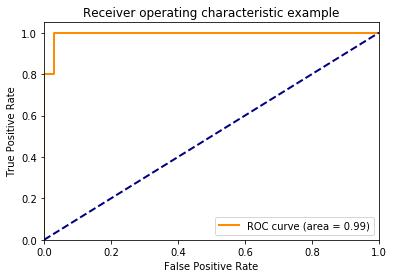

In [15]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()